<h1 align=center>Deep Learning-Based Temperature Forecasting in Turkey: An RNN Approach</font></h1>

<br>

<p align="center">
    <img src="https://ec.europa.eu/eurostat/documents/4187653/16859910/piyaset_AdobeStock_295326025_RV.jpg" height=450 width=2000 alt="European Commission">
</p>

<small>Picture Source: <a href="https://commission.europa.eu/index_en">European Commission</a></small>

<br>

<h2>Abstract</h2>

<p>In an era of increasing climate variability and change, accurate weather forecasting is of paramount importance. This has prompted the development of advanced machine learning models to better predict meteorological phenomena. In the context of Turkey, a country with a diverse climate that spans from the Mediterranean to continental regions, precise temperature forecasting is a vital component of daily life, agriculture, and disaster preparedness. In response to this need, we present a groundbreaking study that leverages Recurrent Neural Networks (RNNs) to enhance temperature prediction across various regions of Turkey. Our RNN-based approach harnesses the power of deep learning to provide more accurate and location-specific temperature forecasts, improving our understanding of Turkey's climate dynamics and its implications for various sectors, including agriculture, energy, and public safety.</p>

<br>

<h2>Context</h2>

<p>In recent years, climate change has brought about significant shifts in weather patterns, making precise and reliable temperature forecasting more critical than ever. Turkey, with its geographically diverse landscape, experiences a wide range of climate conditions, from the coastal areas along the Mediterranean to the inland regions with more continental climates. These variations have a profound impact on various aspects of life in Turkey, including agriculture, energy consumption, tourism, and disaster management. Accurate temperature forecasts are pivotal for making informed decisions in these sectors. However, traditional weather prediction models often struggle to capture the complex and region-specific nuances of Turkey's climate. In this context, the utilization of advanced machine learning techniques, particularly Recurrent Neural Networks (RNNs), has emerged as a promising solution to address the intricacies of weather forecasting in Turkey. RNNs excel in handling sequential data and are well-suited to capture the temporal dependencies present in meteorological time series data. Our study delves into this innovative approach to improve temperature prediction across Turkey, with a focus on enhancing the precision and granularity of weather forecasts in a region where accurate temperature information is of paramount importance.</p>

<br>

<h2>Dataset</h2>

Our study is based on the [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data) available on Kaggle. This dataset provides historical temperature data that is instrumental in our analysis and modeling.

<br>

<h2>Keywords</h2>
<ul>
  <li>Temperature Forecasting</li>
  <li>Recurrent Neural Networks (RNN)</li>
  <li>Climate Prediction</li>
  <li>Weather Modeling</li>
  <li>Turkey Climate Analysis</li>
</ul>

<br>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="">Importing Libraries</a></li>
<li><a href="">Preparing Data for Turkey Temperature Forecasting</a></li>
<li><a href="">Building RNN Model for Forecasting Temperature in Turkey</a></li>

<br>

## Importing Libraries

In [131]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
import tensorflow as tf

## Preparing Data for Turkey Temperature Forecasting

In [2]:
df = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv',)

### Data Preprocessing

Data preprocessing is a critical initial step in data analysis and machine learning. It encompasses tasks like handling missing values, removing duplicates, correcting errors, scaling and normalizing data, encoding categorical variables, and selecting relevant features. Outliers are identified and managed, and time series data is appropriately treated. Data is often divided into training, validation, and testing sets, and methods are applied to address imbalances in classification datasets. This process is essential as it directly influences the quality and effectiveness of subsequent analyses or machine learning models, providing a strong foundation for deriving meaningful insights and building reliable predictive models.

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
df.shape

(577462, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,544811.0,17.193354,10.953966,-37.658,10.025,20.901,25.814,38.842
AverageTemperatureUncertainty,545550.0,1.019057,1.201930,0.052,0.323,0.571,1.206,15.003


In order to focus specifically on data related to Turkey within our DataFrame, we applied a filtering operation using the Pandas library. This operation was executed with the following code: `turkey_df = df.loc[df['Country'] == 'Turkey']`. As a result, a new DataFrame named 'turkey_df' was created, containing exclusively the records associated with Turkey as the country. This allows us to narrow down our analysis and concentrate on the data specific to Turkey, making it easier to explore and draw insights related to this particular geographical region.

In [7]:
turkey_df = df.loc[df['Country'] == 'Turkey']

In [8]:
turkey_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
533683,1777-02-01,3.000,3.314,Turkey
533684,1777-03-01,NaN,NaN,Turkey
533685,1777-04-01,7.678,2.553,Turkey
533686,1777-05-01,15.293,3.189,Turkey
533687,1777-06-01,18.661,2.993,Turkey


In [9]:
turkey_df.isnull().sum()

dt                               0
AverageTemperature               2
AverageTemperatureUncertainty    2
Country                          0
dtype: int64

In [10]:
turkey_df.shape

(2840, 4)

In [ ]:
turkey_df.dropna(inplace=True)

In [12]:
turkey_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
533683,1777-02-01,3.000,3.314,Turkey
533685,1777-04-01,7.678,2.553,Turkey
533686,1777-05-01,15.293,3.189,Turkey
533687,1777-06-01,18.661,2.993,Turkey
533688,1777-07-01,20.757,2.643,Turkey


In [13]:
turkey_df.shape

(2838, 4)

In [14]:
turkey_df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

After filtering the DataFrame for Turkey-specific data, we proceeded to save this refined dataset for future calculations and analyses. The Pandas library provides a convenient method for this purpose.

In [15]:
turkey_df.to_csv('/content/df_turkey.csv', index=False, encoding='utf-8')

## Building RNN Model for Forecasting Temperature in Turkey

In the pursuit of more accurate and location-specific temperature predictions, we embark on a data-driven journey to construct a cutting-edge Recurrent Neural Network (RNN) model tailored for forecasting temperature trends in Turkey. Leveraging the power of deep learning, this project aims to enhance our understanding of Turkey's diverse climate patterns, from coastal regions along the Mediterranean to inland continental areas. By developing an RNN-based model, we anticipate more precise and localized temperature forecasts that are essential for sectors such as agriculture, energy management, tourism, and disaster preparedness in this region. Our journey begins with data preprocessing, model design, training, and rigorous evaluation, all with the goal of improving temperature predictions and contributing to informed decision-making in a rapidly changing climate landscape.

### Building Functions

In [126]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [18]:
def parse_data_from_file(filename):

    times = []
    temperatures = []

    with open(filename) as csvfile:

        reader = csv.reader(csvfile, delimiter=',')

        next(reader)

        step=0
        for row in reader:
            temperatures.append(float(row[1]))
            times.append(step)
            step = step + 1

    return times, temperatures

In [132]:
def train_val_split(time, series, time_step=G.SPLIT_TIME):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid

We defined train-val split as 0.8 and 0.2:

In [53]:
2838 * 0.8

2270.4

1. **TEMPERATURES_CSV** is a class attribute that stores the file path '/content/df_turkey.csv,' presumably a CSV file containing temperature data for Turkey.

2. **times** and **temperatures** are two variables that are initialized by calling a function parse_data_from_file(TEMPERATURES_CSV). It appears that this function reads and parses data from the specified CSV file, resulting in lists of time and temperature values.

3. **TIME** and **SERIES** are two class attributes that store NumPy arrays created from the times and temperatures data, respectively. This conversion to NumPy arrays is likely for more efficient data manipulation and analysis.

4. **SPLIT_TIME** is a class attribute with a value of 2270. It could be a marker used for splitting the data into training and testing sets.

5. **WINDOW_SIZE**, **BATCH_SIZE**, and **SHUFFLE_BUFFER_SIZE** are class attributes that store constants or hyperparameters for use in a machine learning model or data preprocessing. These values may be used for tasks like defining the window size for data sequences, batch size for training, and buffer size for shuffling the data.

In [54]:
@dataclass
class G:
    TEMPERATURES_CSV = '/content/df_turkey.csv'
    times, temperatures = parse_data_from_file(TEMPERATURES_CSV)
    TIME = np.array(times)
    SERIES = np.array(temperatures)
    SPLIT_TIME = 2270
    WINDOW_SIZE = 64
    BATCH_SIZE = 32
    SHUFFLE_BUFFER_SIZE = 1000

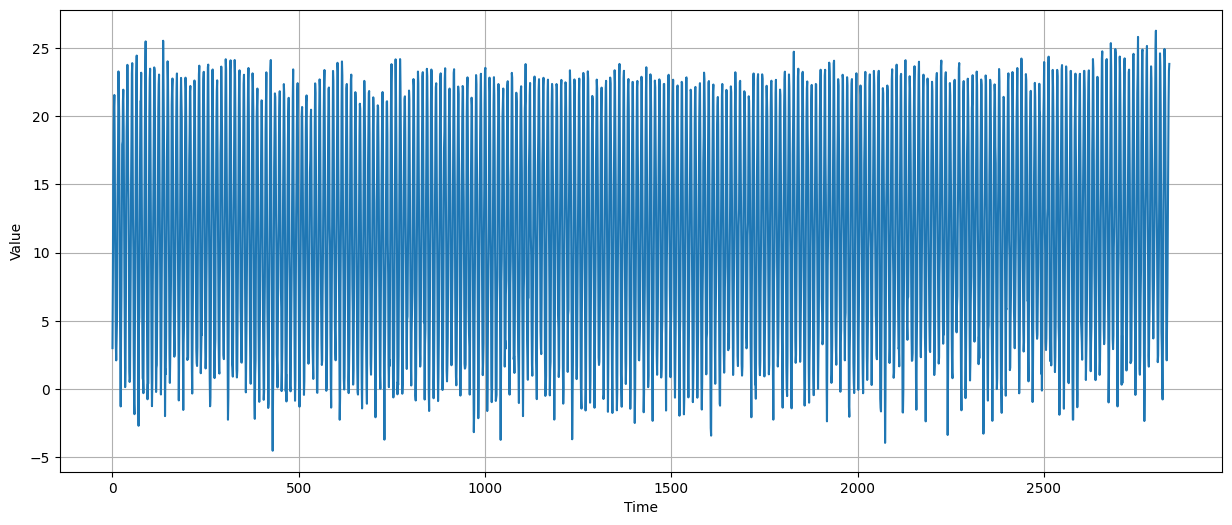

In [129]:
plt.figure(figsize=(15, 6))
plot_series(G.TIME, G.SERIES)
plt.show()

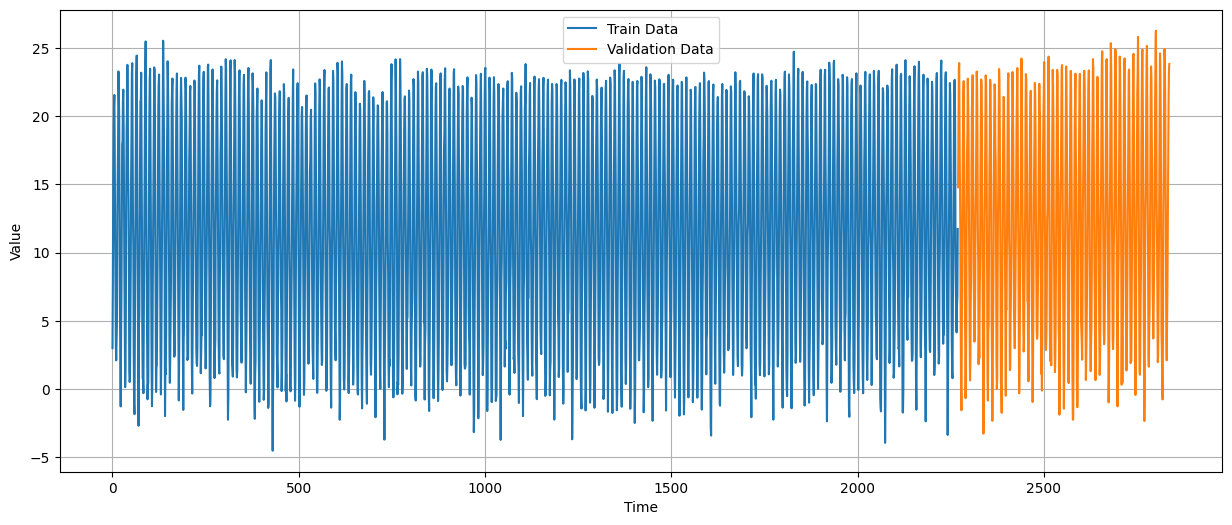

In [128]:
plt.figure(figsize=(15, 6))
plot_series(G.TIME[:G.SPLIT_TIME], G.SERIES[:G.SPLIT_TIME], label="Train Data")
plot_series(G.TIME[G.SPLIT_TIME:], G.SERIES[G.SPLIT_TIME:], label="Validation Data")
plt.legend()
plt.show()

In [57]:
time_train, series_train, time_valid, series_valid = train_val_split(G.TIME, G.SERIES)

In [95]:
time_train.shape

(2270,)

In [96]:
time_valid.shape

(568,)

In [60]:
def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)

    return ds

In [61]:
train_set = windowed_dataset(series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

### Building RNN Model

Our model architecture starts with a convolutional layer for local feature extraction, followed by two LSTM layers for capturing temporal dependencies, and concludes with a stack of dense layers for making predictions. This architecture is commonly used for time series forecasting tasks, and it's a combination of convolutional and recurrent neural networks to effectively model and predict sequences of data points. After defining this model, you would typically compile it with an appropriate loss function, optimizer, and metrics before training it on your data.

In [62]:
def create_uncompiled_model():

    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                          strides=1,
                          activation="relu",
                          padding='causal',
                          input_shape=[None, 1]),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(30, activation="relu"),
      tf.keras.layers.Dense(10, activation="relu"),
      tf.keras.layers.Dense(1)
    ])

    return model

In [64]:
uncompiled_model = create_uncompiled_model()

In [65]:
for X, y in train_set.take(1):

    # Generate a prediction
    print(f'Testing model prediction with input of shape {X.shape}...')
    y_pred = uncompiled_model.predict(X)

Testing model prediction with input of shape (32, 64)...
1/1 [==============================] - 1s 1s/step


In [66]:
y_pred_shape = y_pred.squeeze().shape

In [68]:
tf.keras.backend.clear_session()

Huber loss, also known as the Huber loss function, is a type of loss function used in machine learning, particularly in regression problems. It is designed to address some of the shortcomings of other loss functions like mean squared error (MSE), particularly when dealing with outliers in the data.

<br>

$$
L(y, f(x)) =
\begin{cases}
  \frac{1}{2}(y - f(x))^2 & \text{if } |y - f(x)| \leq \delta \\
  \delta(|y - f(x)| - \frac{1}{2}\delta) & \text{if } |y - f(x)| > \delta
\end{cases}
$$

<br>

When the absolute error $(|y - f(x)|)$ between the true target value $(y)$ and the predicted value by the model $f(x)$ is less than or equal to a threshold value $(\delta)$, the loss is calculated as:

<br>

$$ L(y, f(x)) = \frac{1}{2}(y - f(x))^2 $$

In this regime, the loss behaves like the squared error loss, similar to the mean squared error (MSE).

When the absolute error is greater than the threshold $(|y - f(x)| > \delta)$, the loss is calculated as:

<br>

$$ L(y, f(x)) = \delta(|y - f(x)| - \frac{1}{2}\delta) $$

In this regime, the loss becomes linear and increases with the absolute error, similar to the mean absolute error (MAE).


In [69]:
def create_model():

    model = create_uncompiled_model()

    learning_rate = 5e-3

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

    return model

In [70]:
model = create_model()

In [71]:
history = model.fit(train_set, epochs=50)

Epoch 1/50
69/69 [==============================] - 12s 104ms/step - loss: 5.9804 - mae: 6.4619
Epoch 2/50
69/69 [==============================] - 7s 100ms/step - loss: 1.2188 - mae: 1.6508
Epoch 3/50
69/69 [==============================] - 7s 99ms/step - loss: 0.9803 - mae: 1.4078
Epoch 4/50
69/69 [==============================] - 6s 82ms/step - loss: 0.8413 - mae: 1.2566
Epoch 5/50
69/69 [==============================] - 7s 99ms/step - loss: 0.9113 - mae: 1.3346
Epoch 6/50
69/69 [==============================] - 6s 82ms/step - loss: 0.8200 - mae: 1.2347
Epoch 7/50
69/69 [==============================] - 7s 99ms/step - loss: 0.7825 - mae: 1.1922
Epoch 8/50
69/69 [==============================] - 6s 84ms/step - loss: 0.7743 - mae: 1.1871
Epoch 9/50
69/69 [==============================] - 6s 86ms/step - loss: 0.7532 - mae: 1.1636
Epoch 10/50
69/69 [==============================] - 6s 84ms/step - loss: 0.7915 - mae: 1.2093
Epoch 11/50
69/69 [==============================] - 6s 

Within the context of forecasting, the model_forecast function is designed to make predictions using a given model and a time series dataset. This function processes the input time series, creating a data pipeline to prepare the data for forecasting. It employs windowing techniques to extract sequences of data, batches the sequences, and then utilizes a trained machine learning model to generate forecasts. The resulting predictions are essential for understanding and anticipating future trends and patterns within the time series data, providing valuable insights for various forecasting applications.

In [73]:
def model_forecast(model, series, window_size):

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)

    return forecast

In [74]:
rnn_forecast = model_forecast(model, G.SERIES, G.WINDOW_SIZE).squeeze()

87/87 [==============================] - 4s 31ms/step


In [75]:
rnn_forecast = rnn_forecast[G.SPLIT_TIME - G.WINDOW_SIZE:-1]

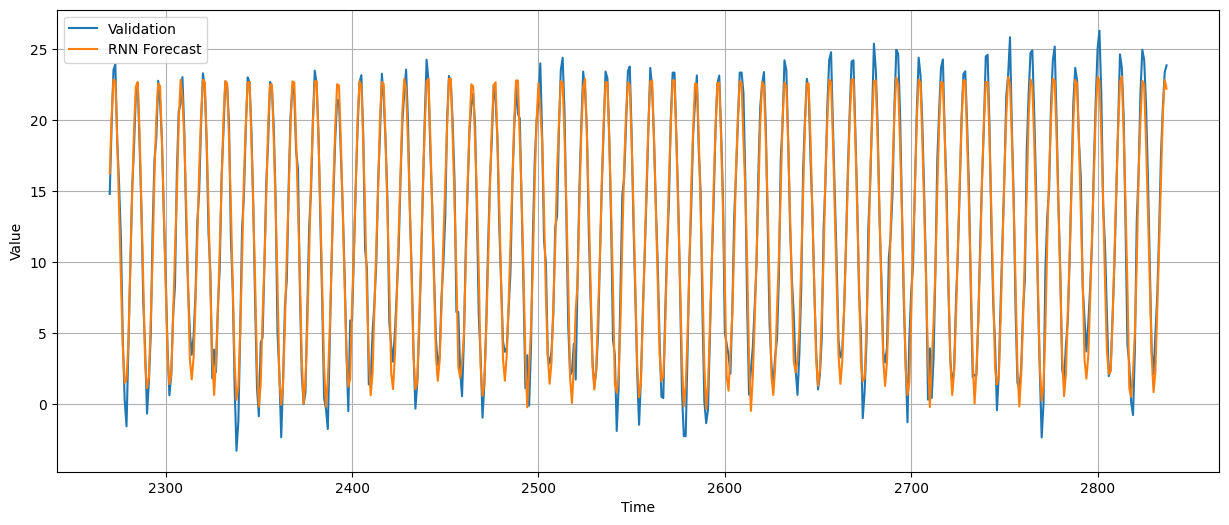

In [134]:
plt.figure(figsize=(15, 6))
plot_series(time_valid, series_valid, label='Validation')
plot_series(time_valid, rnn_forecast, label='RNN Forecast')
plt.legend()
plt.show()

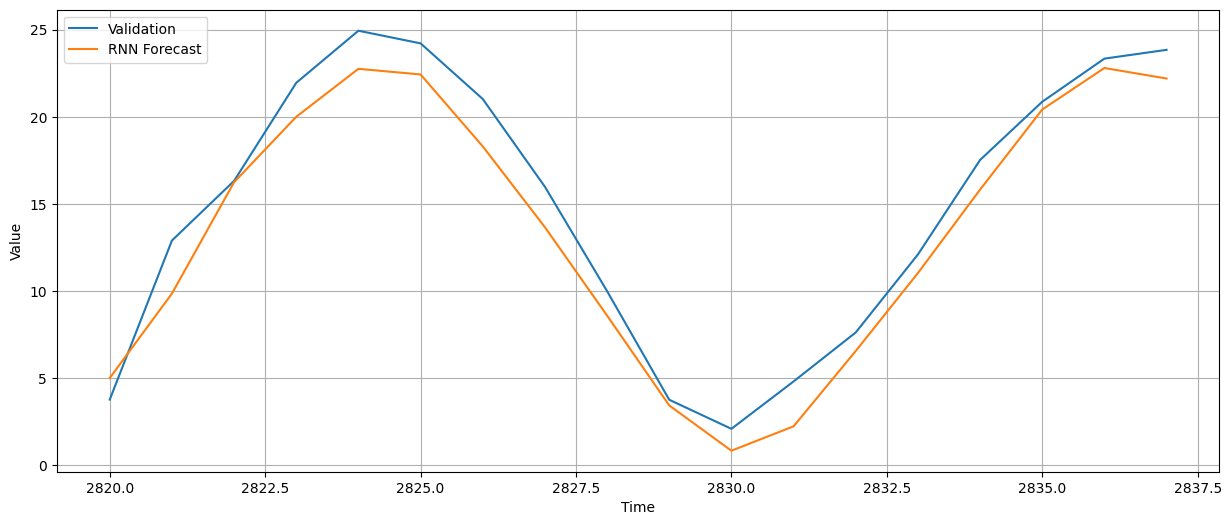

In [135]:
plt.figure(figsize=(15, 6))
plot_series(time_valid[550:], series_valid[550:], label='Validation')
plot_series(time_valid[550:], rnn_forecast[550:], label='RNN Forecast')
plt.legend()
plt.show()

In [136]:
rnn_forecast[550:]

array([ 5.0163555,  9.859198 , 16.248919 , 19.998384 , 22.750845 ,
       22.42817  , 18.30273  , 13.668476 ,  8.598197 ,  3.4444902,
        0.8469602,  2.246771 ,  6.5667157, 11.034461 , 15.822047 ,
       20.416882 , 22.79784  , 22.194574 ], dtype=float32)

In [137]:
 series_valid[550:]

array([ 3.779, 12.901, 16.322, 21.947, 24.936, 24.211, 21.021, 15.988,
       10.001,  3.77 ,  2.103,  4.82 ,  7.63 , 12.102, 17.522, 20.862,
       23.335, 23.839])

In [138]:
mse = tf.keras.metrics.mean_squared_error(series_valid, rnn_forecast).numpy()
mae = tf.keras.metrics.mean_absolute_error(series_valid, rnn_forecast).numpy()
print(f"MSE: {mse:.2f}, MAE: {mae:.2f} for temperature forecast.")

MSE: 2.14, MAE: 1.15 for temperature forecast.


### Save the Model

In [140]:
model.save('save_model/my_model')

In [142]:
!tar -czvf save_model.tar.gz save_model/

save_model/
save_model/my_model/
save_model/my_model/keras_metadata.pb
save_model/my_model/assets/
save_model/my_model/variables/
save_model/my_model/variables/variables.data-00000-of-00001
save_model/my_model/variables/variables.index
save_model/my_model/fingerprint.pb
save_model/my_model/saved_model.pb


<h1>Contact Me</h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [139]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-10-10 21:49:23
